# Task 1:
Read the dataset from the bellow link

url = https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv

In [1]:
import pandas as pd

URL = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv"
df = pd.read_csv(URL)
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


#### 1. Delete unnamed columns

In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1,inplace = True)

In [5]:
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


#### 2. Show the distribution of male and female

In [8]:
df.groupby('Gender')['Gender'].count()

Gender
F    558846
M    457549
Name: Gender, dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Male and Female distribution plot')

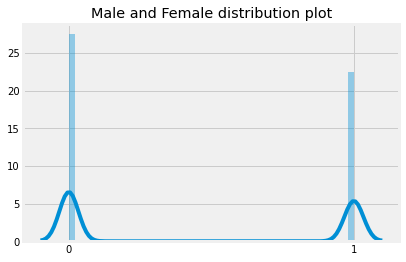

In [14]:
# replacing string "boy" with 1 and "girl" with 0 to create a dist plot
sns.distplot([1 if i=="M" else 0 for i in df.Gender ])
plt.xticks([0,1])
plt.title("Male and Female distribution plot")

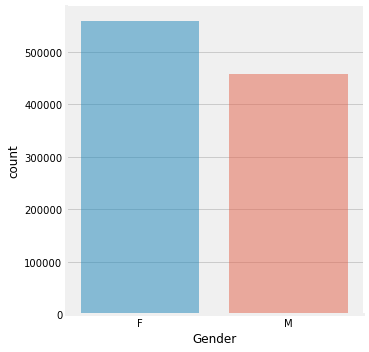

In [16]:
# plotting a count plot for "sex" column categories
sns.catplot(x="Gender", kind="count", data=df, alpha=0.5);

#### 3. Show the top 5 most preferred names

In [18]:
df_name_count = df.groupby('Name')['Name'].count()
df_name_count.sort_values(ascending=False).head()

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

In [20]:
df.Name.value_counts(ascending=False)[:5].to_frame()

,Name
Riley,1112
Avery,1080
Jordan,1073
Peyton,1064
Hayden,1049


### Alternative way

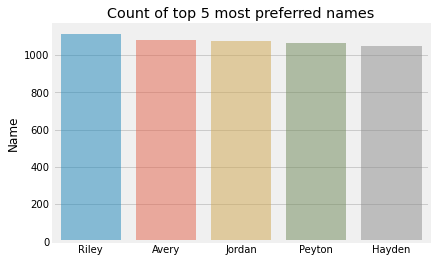

In [21]:
# plotting the above counts of names
sns.barplot(x=df.Name.value_counts(ascending=False)[:5].index,
            y=df.Name.value_counts(ascending=False)[:5],
            alpha=0.5)
plt.title("Count of top 5 most preferred names");

#### 4. What is the median name occurence in the dataset

In [22]:
# printing median names with respect to the value counts
print(df.Name.value_counts(ascending=False)[df.Name.value_counts(ascending=False) == 19.0].index)

Index(['Lanae', 'Joleen', 'Haya', 'Aashi', 'Alizah', 'Sicily', 'Roel', 'Nadav',
       'Basil', 'Corwin',
       ...
       'Trenity', 'Aakash', 'Layken', 'Elsy', 'Dionna', 'Kanon', 'Perel',
       'Goldie', 'Eboni', 'Hindy'],
      dtype='object', length=145)


In [25]:
# printing median name with respect to the reset index after sorting name column
NameDf = df.Name.sort_values(ascending=True).reset_index()[['Name']]
idx = NameDf.index
NameDf[NameDf.index == len(idx)//2]

,Name
508197,Jocelyn


### Alternative Way

In [28]:
df.median()['Id']

2811921.0

In [29]:
df[df['Id'] == df.median()['Id']]['Name']

508197    Kasey
Name: Name, dtype: object

In [31]:
df.groupby('Name')['Name','Count'].median()

,Count
Name,
Aaban,6.0
Aadan,5.5
Aadarsh,5.0
Aaden,10.0
Aadhav,6.0
...,...
Zyra,6.0
Zyrah,5.5
Zyren,6.0


#### 5. Distribution of male and female born count by states

In [33]:
df.groupby(['State','Year','Gender'])['Gender'].count()

State  Year  Gender
AK     2004  F         204
             M         206
       2005  F         214
             M         216
       2006  F         221
                      ... 
WY     2012  M         163
       2013  F         139
             M         178
       2014  F         131
             M         181
Name: Gender, Length: 1122, dtype: int64

------------------------------------------------------------------------------------------------

# Task 2:
We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.

Task:
1. fitting it to the periodic function
2. plot the fit

Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [13]:
data = {"Max":[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25],
        "Min":[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]}

In [14]:
newDf = pd.DataFrame(data)
newDf

,Max,Min
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32
5,51,35
6,45,31
7,38,28
8,37,21
9,29,19


Text(0, 0.5, 'Min and max temperature')

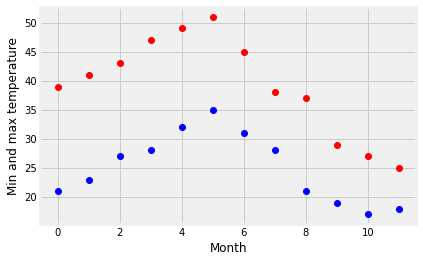

In [36]:
%matplotlib inline
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

### Fitting it to a periodic function

In [37]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

### Plotting the fit

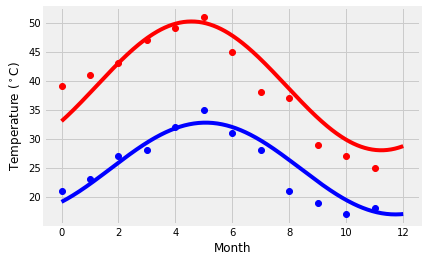

In [40]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()